### 1、	针对分类问题，改变激活函数为selu，观察准确率差异

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import sklearn
import os, sys

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 划分训练集、测试集、验证集
x_val,x_train = x_train[:15000],x_train[15000:]
y_val,y_train = y_train[:15000],y_train[15000:]
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(45000, 28, 28) (45000,)
(15000, 28, 28) (15000,)
(10000, 28, 28) (10000,)


In [4]:
# 对数据集进行标准化
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_train = x_train.reshape(-1,1)
x_train = stand.fit_transform(x_train).reshape(-1,28,28)
x_val = x_val.reshape(-1,1)
x_val = stand.transform(x_val).reshape(-1,28,28)
x_test = x_test.reshape(-1,1)
x_test = stand.transform(x_test).reshape(-1,28,28)
print(x_train[1])
print('-'*30)
print(x_val[1])
print('-'*30)
print(x_test[1])

[[-0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938]
 [-0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938]
 [-0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938 -0.81040938
  -0.81040

In [10]:
# 模型搭建
def build_model():
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    for _ in range(20):
        model.add(layers.Dense(100,activation='relu'))
        model.add(layers.BatchNormalization()) # 添加BN层，进行批量归一化
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(0.001),
                  metrics=['accuracy'])
    return model

In [11]:
model = build_model()
model.summary()

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_40 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_41 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_44 (Dense)            (None, 100)              

In [13]:
# 设置callbacks，方便进行可视化，最优模型保存，提前停止
logdir = './dnn-bn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,'fashon_mnist_model.h5')
callbacks = [keras.callbacks.TensorBoard(logdir),
             keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
             keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

In [14]:
# 开始训练
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val),callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 13s 6ms/step - loss: 2.0106 - accuracy: 0.3356 - val_loss: 1.1794 - val_accuracy: 0.5879
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1688 - accuracy: 0.5929 - val_loss: 0.8933 - val_accuracy: 0.6853
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0166 - accuracy: 0.6361 - val_loss: 0.7633 - val_accuracy: 0.7125
Epoch 4/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9354 - accuracy: 0.6579 - val_loss: 0.7180 - val_accuracy: 0.7301
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8854 - accuracy: 0.6763 - val_loss: 0.6721 - val_accuracy: 0.7464
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8448 - accuracy: 0.6941 - val_loss: 0.6262 - val_accuracy: 0.7678
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 0.8164 - accuracy: 0.7066 - val_loss: 0.6195 - v

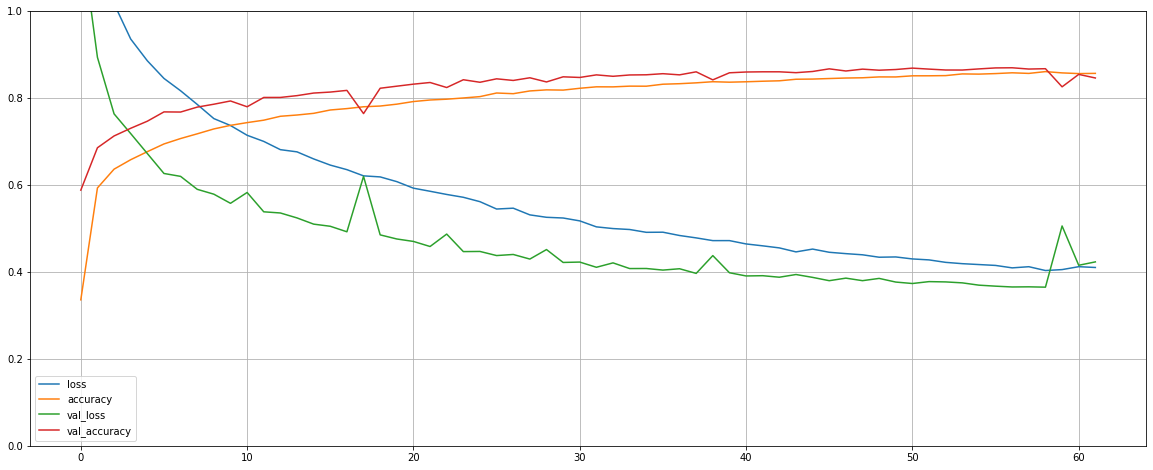

In [17]:
def plot_train_val(history):
    pd.DataFrame(history.history).plot(figsize=(20,8))
    plt.grid()
    plt.gca().set_ylim(0,1)
    plt.show()
plot_train_val(history)

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4539 - accuracy: 0.8308


[0.4539460837841034, 0.8307999968528748]